In [51]:
# Do the necessary imports
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer, IBMQ
from qiskit.visualization import plot_histogram, plot_bloch_multivector
### Creating 3 qubit and 2 classical bits in each separate register
qr = QuantumRegister(3)
crz = ClassicalRegister(1)
crx = ClassicalRegister(1)
teleportation_circuit = QuantumCircuit(qr, crz, crx)
### A third party eve helps to create an entangled state

def create_bell_pair(qc, a, b):
    qc.h(a)
    qc.cx(a, b)
    
create_bell_pair(teleportation_circuit, 1, 2)
teleportation_circuit.draw()

def alice_gates(qc, a, b):
    qc.cx(a, b)
    qc.h(a)

teleportation_circuit.barrier()
alice_gates(teleportation_circuit, 0, 1)
teleportation_circuit.draw()

def measure_and_send(qc, a, b):
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)
teleportation_circuit.barrier()
measure_and_send(teleportation_circuit, 0, 1)
teleportation_circuit.draw()

def bob_gates(qc, qubit, crz, crx):
    qc.x(qubit).c_if(crx, 1)
    qc.z(qubit).c_if(crz, 1)
    
teleportation_circuit.barrier()
bob_gates(teleportation_circuit, 2, crz, crx)
teleportation_circuit.draw()

░      ┌───┐ ░  ░ ┌─┐    ░               
q40_0: ───────────░───■──┤ H ├─░──░─┤M├────░───────────────
       ┌───┐      ░ ┌─┴─┐└───┘ ░  ░ └╥┘┌─┐ ░               
q40_1: ┤ H ├──■───░─┤ X ├──────░──░──╫─┤M├─░───────────────
       └───┘┌─┴─┐ ░ └───┘      ░  ░  ║ └╥┘ ░  ┌───┐  ┌───┐ 
q40_2: ─────┤ X ├─░────────────░──░──╫──╫──░──┤ X ├──┤ Z ├─
            └───┘ ░            ░  ░  ║  ║  ░  └─┬─┘  └─┬─┘ 
                                     ║  ║       │   ┌──┴──┐
c26_0: ══════════════════════════════╩══╬═══════╪═══╡ = 1 ╞
                                        ║    ┌──┴──┐└─────┘
c27_0: ═════════════════════════════════╩════╡ = 1 ╞═══════
                                             └─────┘

In [52]:
from qiskit.extensions import Initialize
import math


qc = QuantumCircuit(1)
initial_state = [0,1]
init_gate = Initialize(initial_state)
# qc.append(initialize_qubit, [0])

In [53]:
qr = QuantumRegister(3)   # Protocol uses 3 qubits
crz = ClassicalRegister(1) # and 2 classical registers
crx = ClassicalRegister(1)
qc = QuantumCircuit(qr, crz, crx)

# First, let's initialise Alice's q0
qc.append(init_gate, [0])
qc.barrier()

# Now begins the teleportation protocol
create_bell_pair(qc, 1, 2)
qc.barrier()
# Send q1 to Alice and q2 to Bob
alice_gates(qc, 0, 1)

# Alice then sends her classical bits to Bob
measure_and_send(qc, 0, 1)

# Bob decodes qubits
bob_gates(qc, 2, crz, crx)

qc.draw()

┌─────────────────┐ ░            ░      ┌───┐ ░ ┌─┐                 
q41_0: ┤ initialize(0,1) ├─░────────────░───■──┤ H ├─░─┤M├─────────────────
       └─────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐              
q41_1: ────────────────────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├──────────────
                           ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ┌───┐  ┌───┐ 
q41_2: ────────────────────░──────┤ X ├─░────────────░──╫──╫──┤ X ├──┤ Z ├─
                           ░      └───┘ ░            ░  ║  ║  └─┬─┘  └─┬─┘ 
                                                        ║  ║    │   ┌──┴──┐
c28_0: ═════════════════════════════════════════════════╩══╬════╪═══╡ = 1 ╞
                                                           ║ ┌──┴──┐└─────┘
c29_0: ════════════════════════════════════════════════════╩═╡ = 1 ╞═══════
                                                             └─────┘

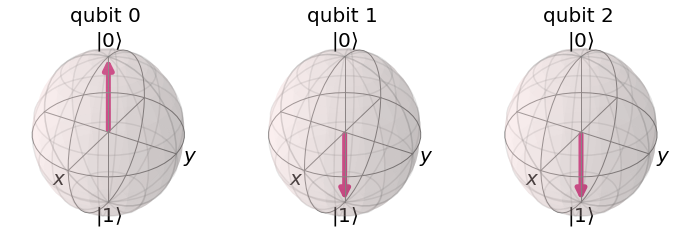

In [54]:
backend = BasicAer.get_backend('statevector_simulator')
out_vector = execute(qc, backend).result().get_statevector()
plot_bloch_multivector(out_vector)

#### Real QC 

In [55]:
inverse_init_gate = init_gate.gates_to_uncompute()


In [56]:
qc.append(inverse_init_gate, [2])
qc.draw()

┌─────────────────┐ ░            ░      ┌───┐ ░ ┌─┐                 »
q41_0: ┤ initialize(0,1) ├─░────────────░───■──┤ H ├─░─┤M├─────────────────»
       └─────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐              »
q41_1: ────────────────────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├──────────────»
                           ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ┌───┐  ┌───┐ »
q41_2: ────────────────────░──────┤ X ├─░────────────░──╫──╫──┤ X ├──┤ Z ├─»
                           ░      └───┘ ░            ░  ║  ║  └─┬─┘  └─┬─┘ »
                                                        ║  ║    │   ┌──┴──┐»
c28_0: ═════════════════════════════════════════════════╩══╬════╪═══╡ = 1 ╞»
                                                           ║ ┌──┴──┐└─────┘»
c29_0: ════════════════════════════════════════════════════╩═╡ = 1 ╞═══════»
                                                             └─────┘       »
«                       
«q41_0: ────────────────
«                       
«q41_1: ────────────────
«       ┌──────────────┐
«q41_2: ┤ disentangler ├
«       └──────────────┘
«c28_0: ════════════════
«                       
«c29_0: ════════════════
«

In [57]:
cr_result = ClassicalRegister(1)
qc.add_register(cr_result)
qc.measure(2,2)
qc.draw()

┌─────────────────┐ ░            ░      ┌───┐ ░ ┌─┐                 »
q41_0: ┤ initialize(0,1) ├─░────────────░───■──┤ H ├─░─┤M├─────────────────»
       └─────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐              »
q41_1: ────────────────────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├──────────────»
                           ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ┌───┐  ┌───┐ »
q41_2: ────────────────────░──────┤ X ├─░────────────░──╫──╫──┤ X ├──┤ Z ├─»
                           ░      └───┘ ░            ░  ║  ║  └─┬─┘  └─┬─┘ »
                                                        ║  ║    │   ┌──┴──┐»
c28_0: ═════════════════════════════════════════════════╩══╬════╪═══╡ = 1 ╞»
                                                           ║ ┌──┴──┐└─────┘»
c29_0: ════════════════════════════════════════════════════╩═╡ = 1 ╞═══════»
                                                             └─────┘       »
c30_0: ════════════════════════════════════════════════════════════════════»
                                                                           »
«                          
«q41_0: ───────────────────
«                          
«q41_1: ───────────────────
«       ┌──────────────┐┌─┐
«q41_2: ┤ disentangler ├┤M├
«       └──────────────┘└╥┘
«c28_0: ═════════════════╬═
«                        ║ 
«c29_0: ═════════════════╬═
«                        ║ 
«c30_0: ═════════════════╩═
«

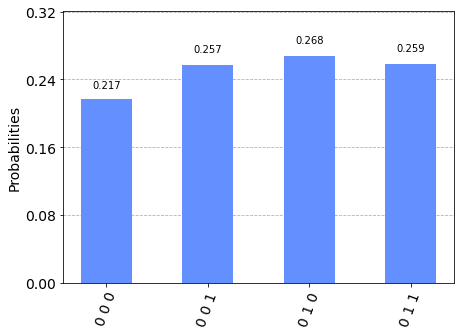

In [58]:
backend = BasicAer.get_backend('qasm_simulator')
counts = execute(qc, backend, shots=1024).result().get_counts()
plot_histogram(counts)

#### On real quantum computer

In [59]:
def bob_gates(qc, a, b, c):
    qc.cz(a, c)
    qc.cx(b, c)

In [60]:
qc = QuantumCircuit(3,1)

# First, let's initialise Alice's q0
qc.append(init_gate, [0])
qc.barrier()

# Now begins the teleportation protocol
create_bell_pair(qc, 1, 2)
qc.barrier()
# Send q1 to Alice and q2 to Bob
alice_gates(qc, 0, 1)
qc.barrier()
# Alice sends classical bits to Bob
bob_gates(qc, 0, 1, 2)

# We undo the initialisation process
qc.append(inverse_init_gate, [2])

# See the results, we only care about the state of qubit 2
qc.measure(2,0)

# View the results:
qc.draw()

┌─────────────────┐ ░            ░      ┌───┐ ░                         »
q_0: ┤ initialize(0,1) ├─░────────────░───■──┤ H ├─░──■──────────────────────»
     └─────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░  │                      »
q_1: ────────────────────░─┤ H ├──■───░─┤ X ├──────░──┼───■──────────────────»
                         ░ └───┘┌─┴─┐ ░ └───┘      ░  │ ┌─┴─┐┌──────────────┐»
q_2: ────────────────────░──────┤ X ├─░────────────░──■─┤ X ├┤ disentangler ├»
                         ░      └───┘ ░            ░    └───┘└──────────────┘»
c_0: ════════════════════════════════════════════════════════════════════════»
                                                                             »
«        
«q_0: ───
«        
«q_1: ───
«     ┌─┐
«q_2: ┤M├
«     └╥┘
«c_0: ═╩═
«

In [63]:
from qiskit import IBMQ
IBMQ.save_account('### IMB TOKEN ')

In [64]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_rome') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [65]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                   not b.configuration().simulator and b.status().operational==True))
job_exp = execute(qc, backend=backend, shots=8192)

{'1': 676, '0': 7516}


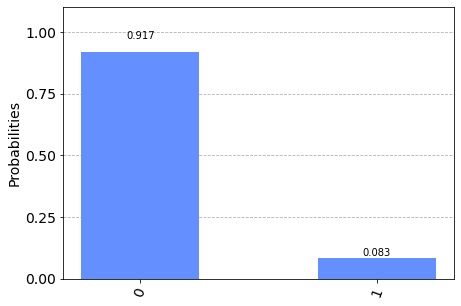

In [66]:
exp_result = job_exp.result()
exp_measurement_result = exp_result.get_counts(qc)
print(exp_measurement_result)
plot_histogram(exp_measurement_result)

In [67]:
error_rate_percent = sum([exp_measurement_result[result] for result in exp_measurement_result.keys() if result[0]=='1']) \
                    * 100./ sum(list(exp_measurement_result.values()))
print("The experimental error rate : ", error_rate_percent, "%")

The experimental error rate :  8.251953125 %
